In [392]:
import pandas as pd
import numpy as np
import itertools as it
import functools as ft
import multiprocessing as mp

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model.coordinate_descent import LinearModelCV
from sklearn.linear_model import ElasticNetCV
from sklearn.base import RegressorMixin
from sklearn.model_selection import cross_validate
from sklearn.metrics import *

from scipy.stats import norm

%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
# define data dictionaries
X = {}
y = {}
targ = {}

for t in ['train', 'dev', 'test']:
    X[t] = pd.read_csv('../data/modelInputs/growth/X_'+t+'.csv', index_col=0)
    display('X', t, X[t].head())
    
for t in ['train', 'dev', 'test']:
    y[t] = pd.read_csv('../data/modelInputs/growth/y_'+t+'.csv', index_col=0)['x']
    display('y', t, y[t].head())
    
for t in ['train', 'dev', 'test']:
    targ[t] = pd.read_csv('../data/modelInputs/growth/targ_'+t+'.csv', index_col=0)['x']
    display('targ', t, targ[t].head())

'X'

'train'

,(Intercept),Cellline184a1,Cellline184b5,Cellline2313287,Cellline600mpe,Cellline769p,Cellline786o,Cellline8305c,Cellline8505c,Celllinea172,...,TGFBR2,TNIK,TNK1,TNK2,TP53RK,TTK,TYK2,ULK1,WEE1,YES1
1,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'X'

'dev'

,(Intercept),Cellline184a1,Cellline184b5,Cellline2313287,Cellline600mpe,Cellline769p,Cellline786o,Cellline8305c,Cellline8505c,Celllinea172,...,TGFBR2,TNIK,TNK1,TNK2,TP53RK,TTK,TYK2,ULK1,WEE1,YES1
6,1,1,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,1,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,1,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30,1,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'X'

'test'

,(Intercept),Cellline184a1,Cellline184b5,Cellline2313287,Cellline600mpe,Cellline769p,Cellline786o,Cellline8305c,Cellline8505c,Celllinea172,...,TGFBR2,TNIK,TNK1,TNK2,TP53RK,TTK,TYK2,ULK1,WEE1,YES1
11,1,0,1,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,1,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42,1,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
49,1,0,0,0,0,0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


'y'

'train'

1   -0.898065
2   -0.759458
3   -0.648105
4   -0.483650
5   -0.295726
Name: x, dtype: float64

'y'

'dev'

1   -0.060469
2    0.689333
3    0.941407
4    0.999999
5    0.991569
Name: x, dtype: float64

'y'

'test'

1   -0.484112
2   -0.233132
3   -0.190305
4   -0.901301
5    0.886902
Name: x, dtype: float64

'targ'

'train'

1   -1.635543
2   -1.173632
3   -0.930919
4   -0.648982
5   -0.379557
Name: x, dtype: float64

'targ'

'dev'

1   -0.075860
2    1.013823
3    1.891235
4    4.949511
5    2.634300
Name: x, dtype: float64

'targ'

'test'

1   -0.649697
2   -0.296475
3   -0.240820
4   -1.651195
5    1.584421
Name: x, dtype: float64

In [18]:
np.argmax(np.array([0,1,2,3,4]))

4

In [382]:
# we want to extend a regressor, although we have to consider adding in a classifier
class HierarchicalClfRegressor(LinearModel, RegressorMixin):
    

    def __init__(self, thresh, clf_loss='hinge', 
                 clf_cv_metric=f1_score, n_jobs=max(1, mp.cpu_count()-1), 
                 clf_l1_ratio=0.5, clf_cv=5, clf_class_weight='balanced', 
                 reg_cv=5, reg_l1_ratio=0.5, clf_ensemble_method='CV'):
        '''
        n_jobs -- maximum number of jobs to use
        thresh -- used to determine the class targets for the clf
        
        '''
        self.thresh = thresh
        self.clf_ensemble_method = clf_ensemble_method
        
        self.clf_cv_metric = clf_cv_metric
        self.clf_loss = clf_loss
        self.clf_l1_ratio = clf_l1_ratio
        self.clf_cv = clf_cv
        self.clf_class_weight = clf_class_weight
        
        self.n_jobs = n_jobs
        
        self.reg_l1_ratio = reg_l1_ratio
        self.reg_cv = reg_cv
        
        self.clf_cross_val = None
        
        if self.clf_ensemble_method == 'CV':
            self.clf = SGDClassifier(n_jobs=self.n_jobs//self.clf_cv, penalty='elasticnet', loss=self.clf_loss,
                                     learning_rate='optimal', class_weight=self.clf_class_weight, l1_ratio=self.clf_l1_ratio)
        elif self.clf_ensemble_method == 'early_stopping':
            self.clf = SGDClassifier(n_jobs=self.n_jobs, penalty='elasticnet', loss=self.clf_loss,
                                     learning_rate='optimal', class_weight=self.clf_class_weight, l1_ratio=self.clf_l1_ratio,
                                     early_stopping=True, validation_fraction=.2, max_iter=10, tol=1e-6)
        else:
            self.clf = BaggingClassifier(base_estimator=SGDClassifier(penalty='elasticnet', loss=self.clf_loss, learning_rate='optimal', class_weight=self.clf_class_weight, l1_ratio=self.clf_l1_ratio),
                                        n_estimators=20, max_samples=0.632, oob_score=True, n_jobs=n_jobs)
                                         
        self.reg = ElasticNetCV(l1_ratio=self.reg_l1_ratio, n_jobs=self.n_jobs//self.reg_cv, fit_intercept=False, cv=self.reg_cv)
        
        
    def fit(self, X, y=None, y_clf=None, y_reg=None):
        '''
        Either y or both y_clf and y_reg must be not None
        y_clf and y_reg are transformations of each other (same dimensions)
        '''
        if y is None:
            pass
        else:
            y_clf = y
            y_reg = y
        
        # fit the classifier
        target = (y_clf >= 1. - self.thresh)*1.
        
        if self.clf_ensemble_method == 'CV':
            self.clf_cross_val = cross_validate(self.clf, X, target, scoring=make_scorer(self.clf_cv_metric),
                                                cv=self.clf_cv, n_jobs=self.clf_cv,
                                                return_estimator=True)
    
            max_clf_cv = np.argmax(self.clf_cross_val['test_score'])
        
            self.clf = self.clf_cross_val['estimator'][max_clf_cv]
        else:
            self.clf.fit(X, target)
        
        # extract the clf predictions
        clf_predictions = self.clf.predict(X)
        
        # estimate the clf best prediction for the y_reg
        self.clf_mean_prediction = np.mean(y_reg[clf_predictions==1])
        
        # use the clf to fit the class zero predictions with a linear model
        self.reg.fit(X[clf_predictions==0], y_reg[clf_predictions==0])
        
    def predict(self, X):
        # final predictions to output
        end_preds = np.zeros((X.shape[0]))
    
        # estimate with the clf predictors
        clf_preds = self.clf.predict(X)
        end_preds[clf_preds==1] = self.clf_mean_prediction
        
        # predict the clf_negatives
        reg_preds = self.reg.predict(X[clf_preds==0])
        end_preds[clf_preds==0] = reg_preds
        
        return end_preds
        

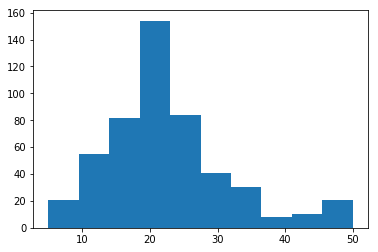

In [25]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
boston_X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_y = pd.Series(boston['target'])

plt.hist(boston_y)
plt.show()

In [59]:
boston_targ = boston_y / np.max(boston_y)
bX_train, bX_test, by_train, by_test, btarg_train, btarg_test = train_test_split(boston_X, boston_y, boston_targ, test_size=0.2)

In [241]:
mod = HierarchicalClfRegressor(thresh=.2, clf_cv=3, reg_cv=3, n_jobs=6)

In [242]:
mod.fit(bX_train, y_clf=btarg_train, y_reg=by_train)

(array([ 2.,  2.,  1.,  0.,  4., 16., 31., 27.,  8., 11.]),
 array([ 4.23143773,  6.96183562,  9.69223352, 12.42263141, 15.1530293 ,
        17.8834272 , 20.61382509, 23.34422299, 26.07462088, 28.80501877,
        31.53541667]),
 <a list of 10 Patch objects>)

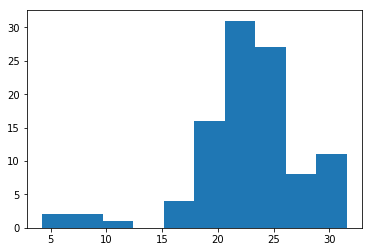

In [243]:
plt.hist(mod.predict(bX_test))

In [383]:
mod = HierarchicalClfRegressor(thresh=1e-12, clf_cv=5, clf_class_weight='balanced',
                               clf_ensemble_method='bagging', clf_loss='squared_hinge',
                               reg_cv=5, n_jobs=10, clf_cv_metric=accuracy_score,
                               reg_l1_ratio=[0.1, 0.5, 0.9, 0.99, 1.0])

In [384]:
mod.fit(X['train'], y_clf=y['train'], y_reg=targ['train']);

/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/isrobson/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

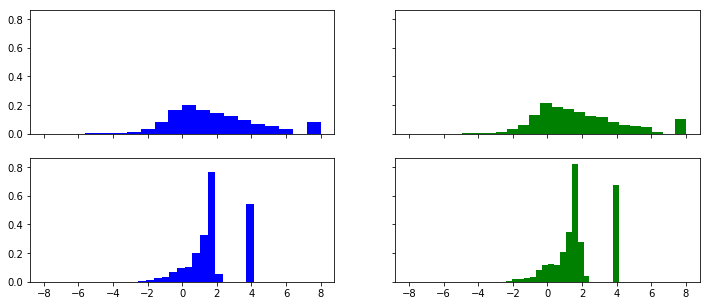

In [391]:
fig, axes = plt.subplots(figsize=(12,5), ncols=2, nrows=2, sharey=True, sharex=True)

axes[0][0].hist(targ['train'], bins=20, density=True, color='b')
axes[0][1].hist(targ['dev'], bins=20, density=True, color='g')

p_train = mod.predict(X['train'])
p_dev = mod.predict(X['dev'])

axes[1][0].hist(p_train, bins=20, density=True, color='b')
axes[1][1].hist(p_dev, bins=20, density=True, color='g')

plt.show()

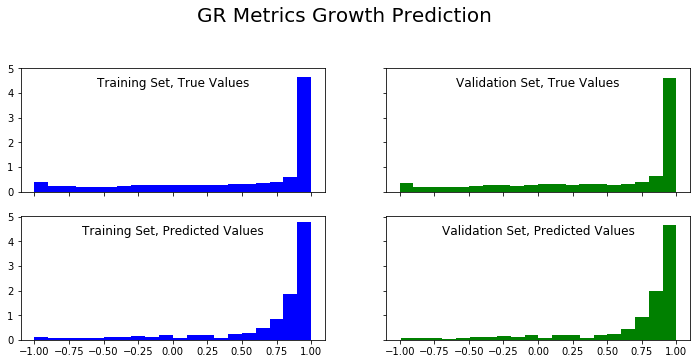

In [404]:
fig, axes = plt.subplots(figsize=(12,5), ncols=2, nrows=2, sharey=True, sharex=True)

plt.suptitle('GR Metrics Growth Prediction', y=1.05, fontsize=20)
#plt.title('+1 = No Effect, 0 = Cytostatic response, -1 = Cell Death', y=1.0, fontsize=10)

axes[0][0].hist(y['train'], bins=20, density=True, color='b')
axes[0][0].set_title('Training Set, True Values', y=.8)

axes[0][1].hist(y['dev'], bins=20, density=True, color='g')
axes[0][1].set_title('Validation Set, True Values', y=.8)

axes[1][0].hist((norm.cdf(p_train)-.5)*2, bins=20, density=True, color='b')
axes[1][0].set_title('Training Set, Predicted Values', y=.8)

axes[1][1].hist((norm.cdf(p_dev)-.5)*2, bins=20, density=True, color='g')
axes[1][1].set_title('Validation Set, Predicted Values', y=.8)

plt.show()

In [ ]:
fig, axes = plt.subplots(figsize=(12,5), ncols=2, sharey=True)

p_train = mod.predict(X['train'])
p_dev = mod.predict(X['dev'])

axes[0].hist(p_train, bins=20, density=True, color='b')
axes[1].hist(p_dev, bins=20, density=True, color='g')

plt.show()

In [405]:
mod.clf.score(X['dev'], (y['dev']>1-1e-12)*1.)

0.8066378066378066

In [388]:
display(np.mean(targ['train'][y['train']>1-1e-12]))
display(np.mean(targ['dev'][y['dev']>1-1e-12]))

8.0

8.0

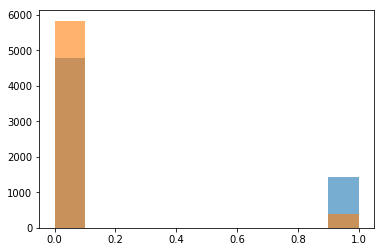

In [406]:
plt.hist(mod.clf.predict(X['dev']), alpha=0.6)
plt.hist((y['dev']>1-1e-12)*1., alpha=0.6)

plt.show()